Równanie przewodnictwa cieplnego:

\begin{equation*}
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
\end{equation*}

\begin{equation*}
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2}
\end{equation*}


\begin{equation*}
\frac{\partial^2 u}{\partial y^2} \approx \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{(\Delta y)^2}
\end{equation*}

Gdzie:
- u - temperatura,
- t - czas,
- $ \alpha $ - współczynnik przewodzenia ciepła,
- x i y - współrzędne przestrzenne,
- $ \Delta x $ i $\Delta y $ - kroki przestrzenne wzdłuż osi x i y 
- $ u_{i,j} $ - temperatura w punkcie $ (x_i, y_j) $.


Metoda różnic skończonych (finite difference method) 


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def plot(X: np.ndarray, Y: np.ndarray, u: np.ndarray, title: str):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, Y, u, cmap="viridis", rstride=5, cstride=5, alpha=0.7)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Temperatura")
    ax.set_title(title)
    ax.set_box_aspect(aspect=None, zoom=0.8)
    ax.set_zlim(0, 1)

    plt.show()

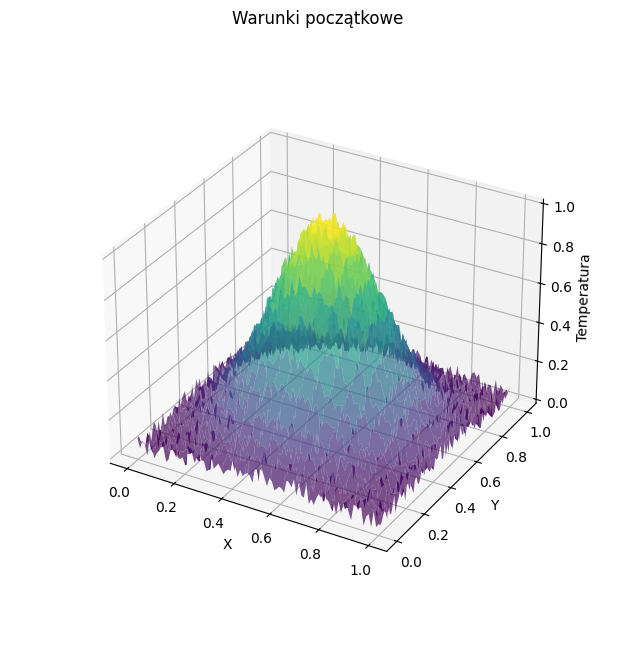

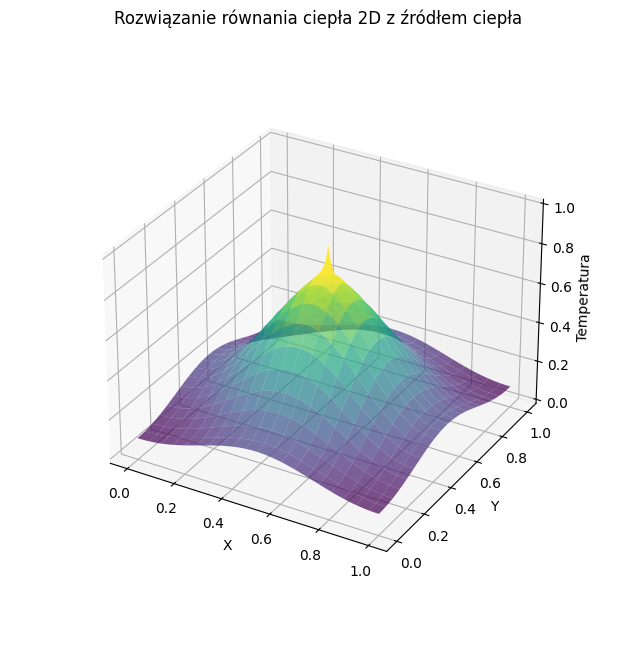

In [14]:
# Parametry symulacji
Lx = Ly = 1.0           # Rozmiary obszaru
Nx = Ny = 100           # Liczba punktów siatki w każdym kierunku
T = 1.0                 # Czas trwania symulacji
dt = 0.0001             # Krok czasowy
std_dev = 0.2           # Odchylenie standardowe rozkładu początkowego 
noise_intensity = 0.1   # Intensywność szumów w stanie początkowym
alpha = 0.01            # Współczynnik przewodzenia ciepła
source = (0.5, 0.5)     # Położenie źródła ciepła
source_power = 0.003    # Moc źródła ciepła

# Krok przestrzenny
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)

# Tworzenie siatki
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Warunki początkowe
u: np.ndarray = np.exp(-((X - source[0]) ** 2 + (Y - source[1]) ** 2) / (2 * std_dev ** 2))
u[:, :] += noise_intensity * np.random.rand(Nx, Ny)  # Dodanie szumu

# Indeks źródła
source_loc = int(source[0] / Lx * Nx), int(source[1] / Ly * Ny)

plot(X, Y, u, "Warunki początkowe")

# Funcja kroku
for _ in np.arange(0, T, dt):
    # Powielenie wartości brzegowych
    u[+0, :] = u[+1, :]
    u[-1, :] = u[-2, :]
    u[:, +0] = u[:, +1]
    u[:, -1] = u[:, -2]

    du2_dx2 = (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / dx**2
    du2_dy2 = (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, :-2]) / dy**2
    u[1:-1, 1:-1] += alpha * dt * (du2_dx2 + du2_dy2)

    # Źródło ciepła
    u[source_loc] += source_power

# Wykres wyników
plot(X, Y, u,"Rozwiązanie równania ciepła 2D z źródłem ciepła")